<a href="https://colab.research.google.com/github/Seungwon-hub/ESAA/blob/main/ESAA_YB_Week12_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 7: 군집화

## 1. K-평균 알고리즘 이해

- K-평균: 군집 중심점이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법

- K-평균 장점: 일반적인 군집화에서 가장 많이 활용되는 알고리즘. 알고리즘이 쉽고 간결함.

- K-평균 단점: 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 정확도 떨어짐. 반복 횟수 많을 경우 수행 시간 매우 느려짐. 몇 개의 군집을 선택해야 할지 가이드하기 어려움.

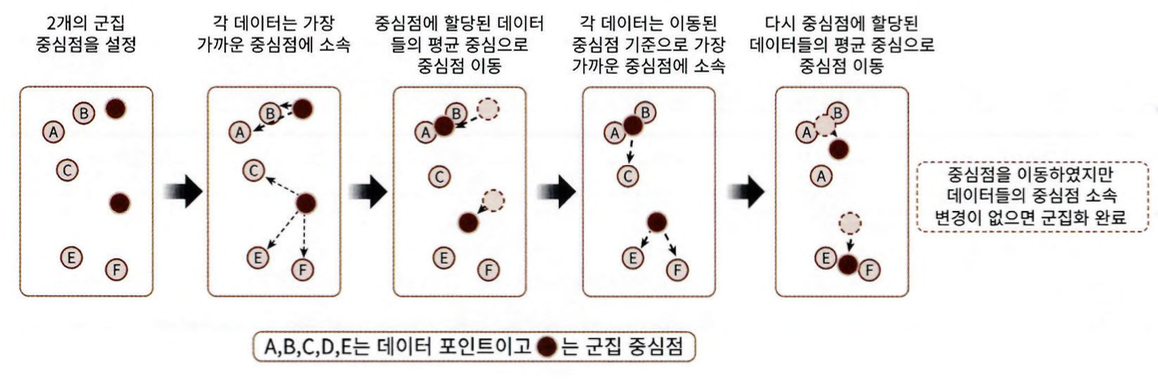

### 사이킷런 KMeans 클래스 소개

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=8,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='lloyd'
)

### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [19]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()

# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',
                                               'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [20]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [21]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [22]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


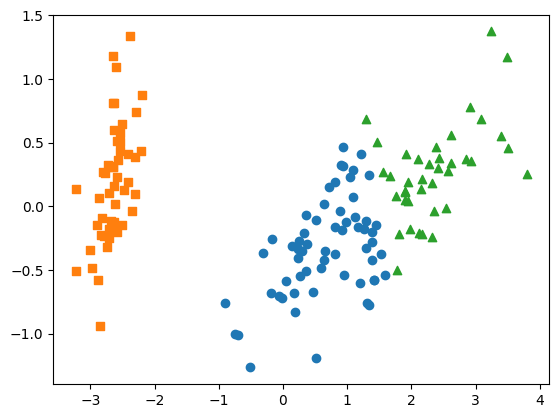

In [25]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

### 군집화 알고리즘 테스트를 위한 데이터 생성

<대표적인 군집화용 데이터 생성기>
- make_blobs(), make_classification()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y_target값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [3]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


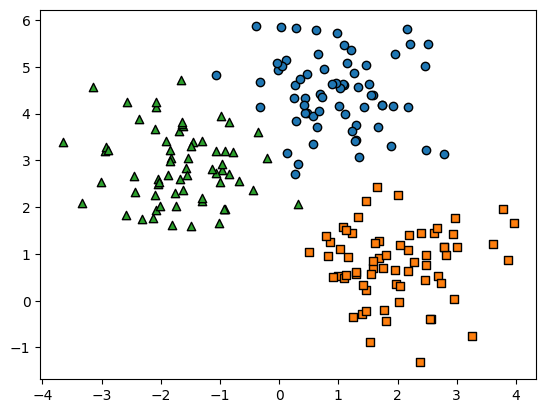

In [4]:
target_list = np.unique(y)

# 각 타깃별 산점도의 마커 값
markers = ['o','s','^','P','D','H','x']

# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'],
              edgecolor='k', marker=markers[target])

plt.show()

이렇게 만들어진 데이터 세트에 KMeans 군집화를 수행한 뒤 군집별로 시각화.

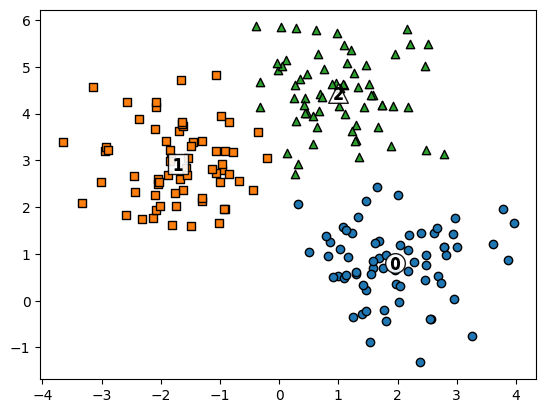

In [6]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200,random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration하면서 marker별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'],
              edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
              alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
              edgecolor='k', marker='$%d$'%label)

plt.show()

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음.

In [7]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


## 2. 군집 평가(Cluster Evaluation)

대부분의 군집화 데이터 세트는 비교할 만한 타깃 레이블을 가지고 있지 않음. 또한 군집화는 Classification과 유사해 보일 수 있으나 성격이 많이 다름. 데이터 내에 숨어 있는 별도의 그룹을 찾아서 의미를 부여하거나 동일한 분류 값에 속하더라도 그 안에서 더 세분화된 군집화를 추구하거나 서로 다른 분류 값의 데이터도 더 넓은 군집화 레벨화 등의 영역을 갖고 있음.

군집화의 성능 평가하는 대표적인 방법: 실루엣 분석

### 실루엣 분석의 개요

실루엣 분석은 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄. 효율적으로 잘 분리됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미임. 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있을 것임.

실루엣 분석은 실루엣 계수를 기반으로 함. 실루엣 계수는 개별 데이터가 가지는 군집화 지표임.

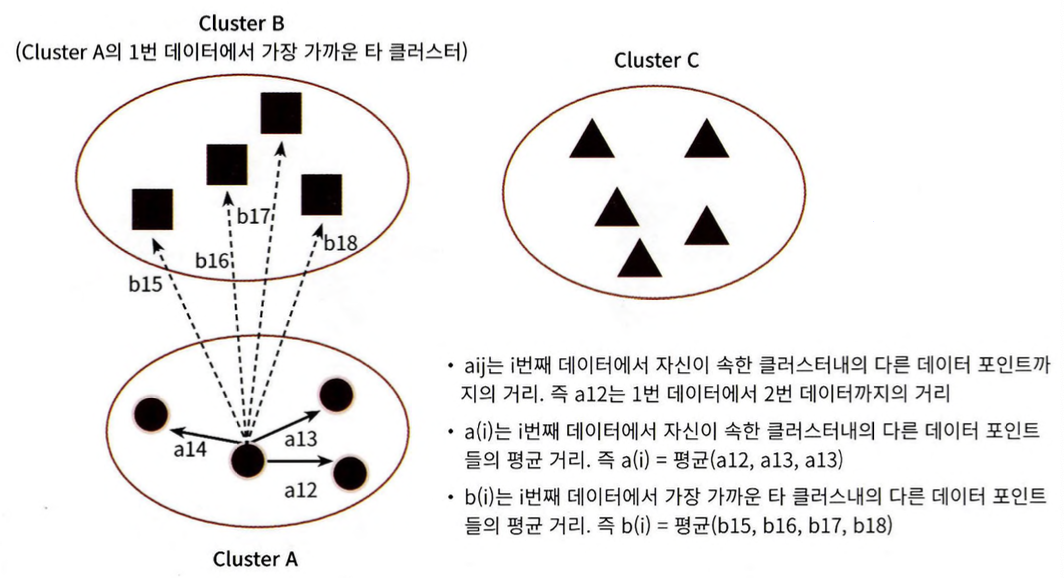

<메서드>
- sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)
- sklearn.metrics.silhouette_score(X, labels, metric='euclidean', sample_size=None, **kwds)

<좋은 군집화가 되기 위한 조건>
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhouette_score() 값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 하지만 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함. 즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요함.

### 붓꽃 데이터 세트를 이용한 군집 평가

In [8]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


- 평균 실루엣 계수 값 = 0.551

In [9]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


상대적으로 0,2번의 평균값이 낮음

### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

전체 데이터의 평균 실루엣 계수 값이 높다고 해서 반드시 최적의 군집 개수로 군집화가 잘 됐다고 볼 수 없음. 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐 있는 경우에 k-평균의 적절한 군집 개수가 설정됐다고 판단할 수 있음.

<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: Matplotlib

Number of Cluster: 2, Average Silhouette Score: 0.582
Number of Cluster: 3, Average Silhouette Score: 0.460
Number of Cluster: 4, Average Silhouette Score: 0.387
Number of Cluster: 5, Average Silhouette Score: 0.346


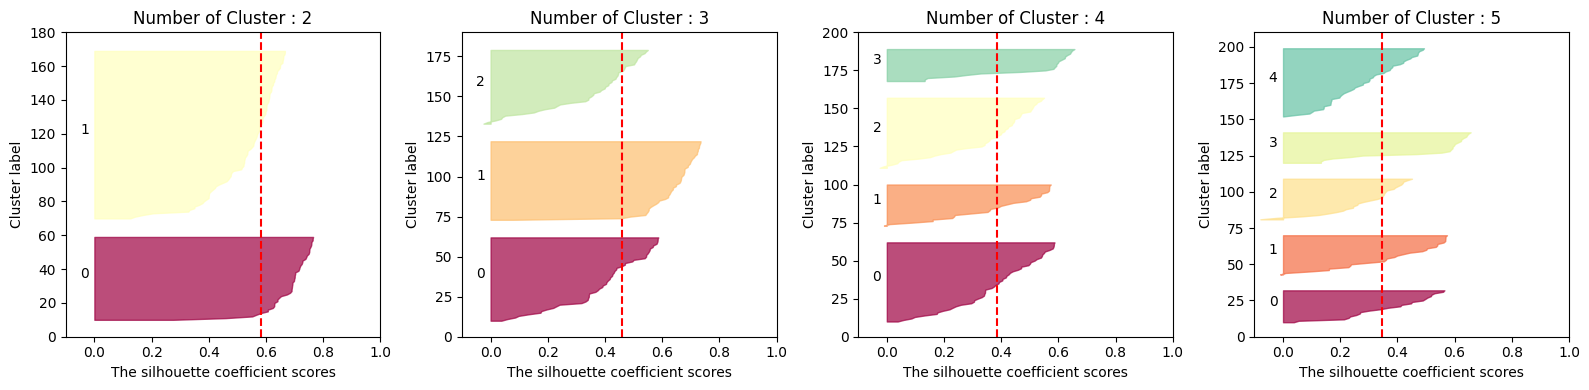

In [11]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Iris dataset and scale the features
iris = load_iris()
X_features = scale(iris.data)

def visualize_silhouette(cluster_lists, X_features):
    # Visualize the silhouette scores of samples using matplotlib
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        # Create a KMeans object with n_clusters
        kmeans = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=500, random_state=0, n_init=10)
        cluster_labels = kmeans.fit_predict(X_features)

        # Calculate silhouette_score
        avg_score = silhouette_score(X_features, cluster_labels)

        # Calculate silhouette_samples
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        # Plotting
        axs[ind].set_title(f'Number of Cluster : {n_cluster}')
        axs[ind].set_xlabel("The silhouette coefficient scores")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])

        y_lower = 10
        score_lists = []
        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

            # Save the scores
            score_lists.extend(ith_cluster_silhouette_values)

        # Vertical line for average silhouette score
        axs[ind].axvline(x=avg_score, color="red", linestyle="--")

        # Save the average silhouette score as a variable within the function scope if needed later
        # For now, we just print it
        print(f'Number of Cluster: {n_cluster}, Average Silhouette Score: {avg_score:.3f}')

    plt.tight_layout()
    plt.show()

# Now you can call the function
visualize_silhouette([2,3,4,5], X_features)

<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: Matplotlib

Number of Cluster: 2, Average Silhouette Score: 0.705
Number of Cluster: 3, Average Silhouette Score: 0.588
Number of Cluster: 4, Average Silhouette Score: 0.651
Number of Cluster: 5, Average Silhouette Score: 0.575


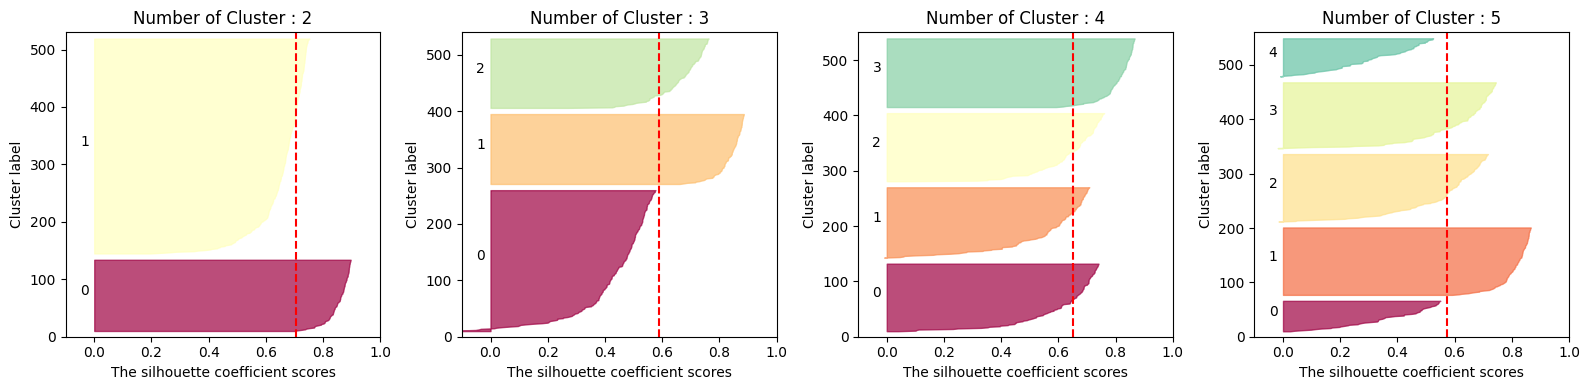

In [12]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2,3,4,5],X)

- 4개 군집일 때 가장 최적

<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_cluster)
<ipython-input-11-a7b39d491513>:46: Matplotlib

Number of Cluster: 2, Average Silhouette Score: 0.681
Number of Cluster: 3, Average Silhouette Score: 0.553
Number of Cluster: 4, Average Silhouette Score: 0.498
Number of Cluster: 5, Average Silhouette Score: 0.489


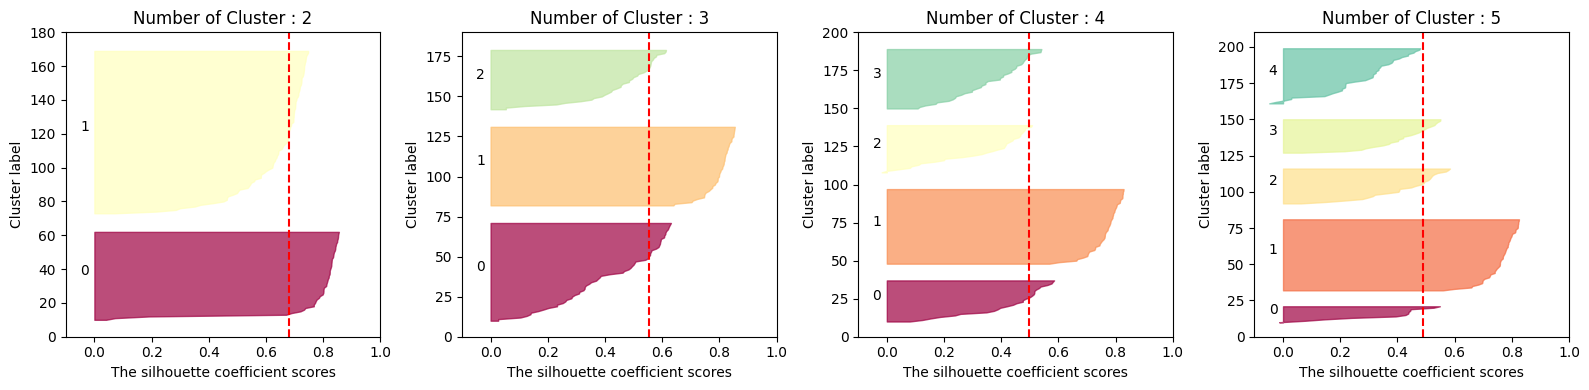

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

- 2개로 하는 것이 가장 좋아 보임.
- 3개의 경우 평균 실루엣 계수 값도 2개보다 작을뿐더러 1번 군집과 다른 0번, 2번 군집과의 실루엣 계수의 편차가 큼